In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [3]:
with open("data.csv") as f:
    data = pd.read_csv(f)
    
data

,angle,peak_n
0,0,897
1,10,893
2,20,845
3,30,689
4,40,683
5,50,560
6,60,488
7,70,421
8,80,383
9,90,345


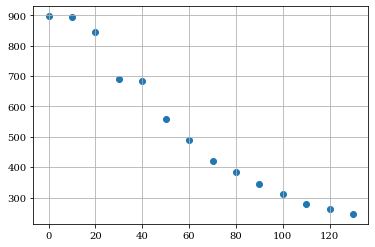

In [5]:
plt.scatter(data.angle, data.peak_n)

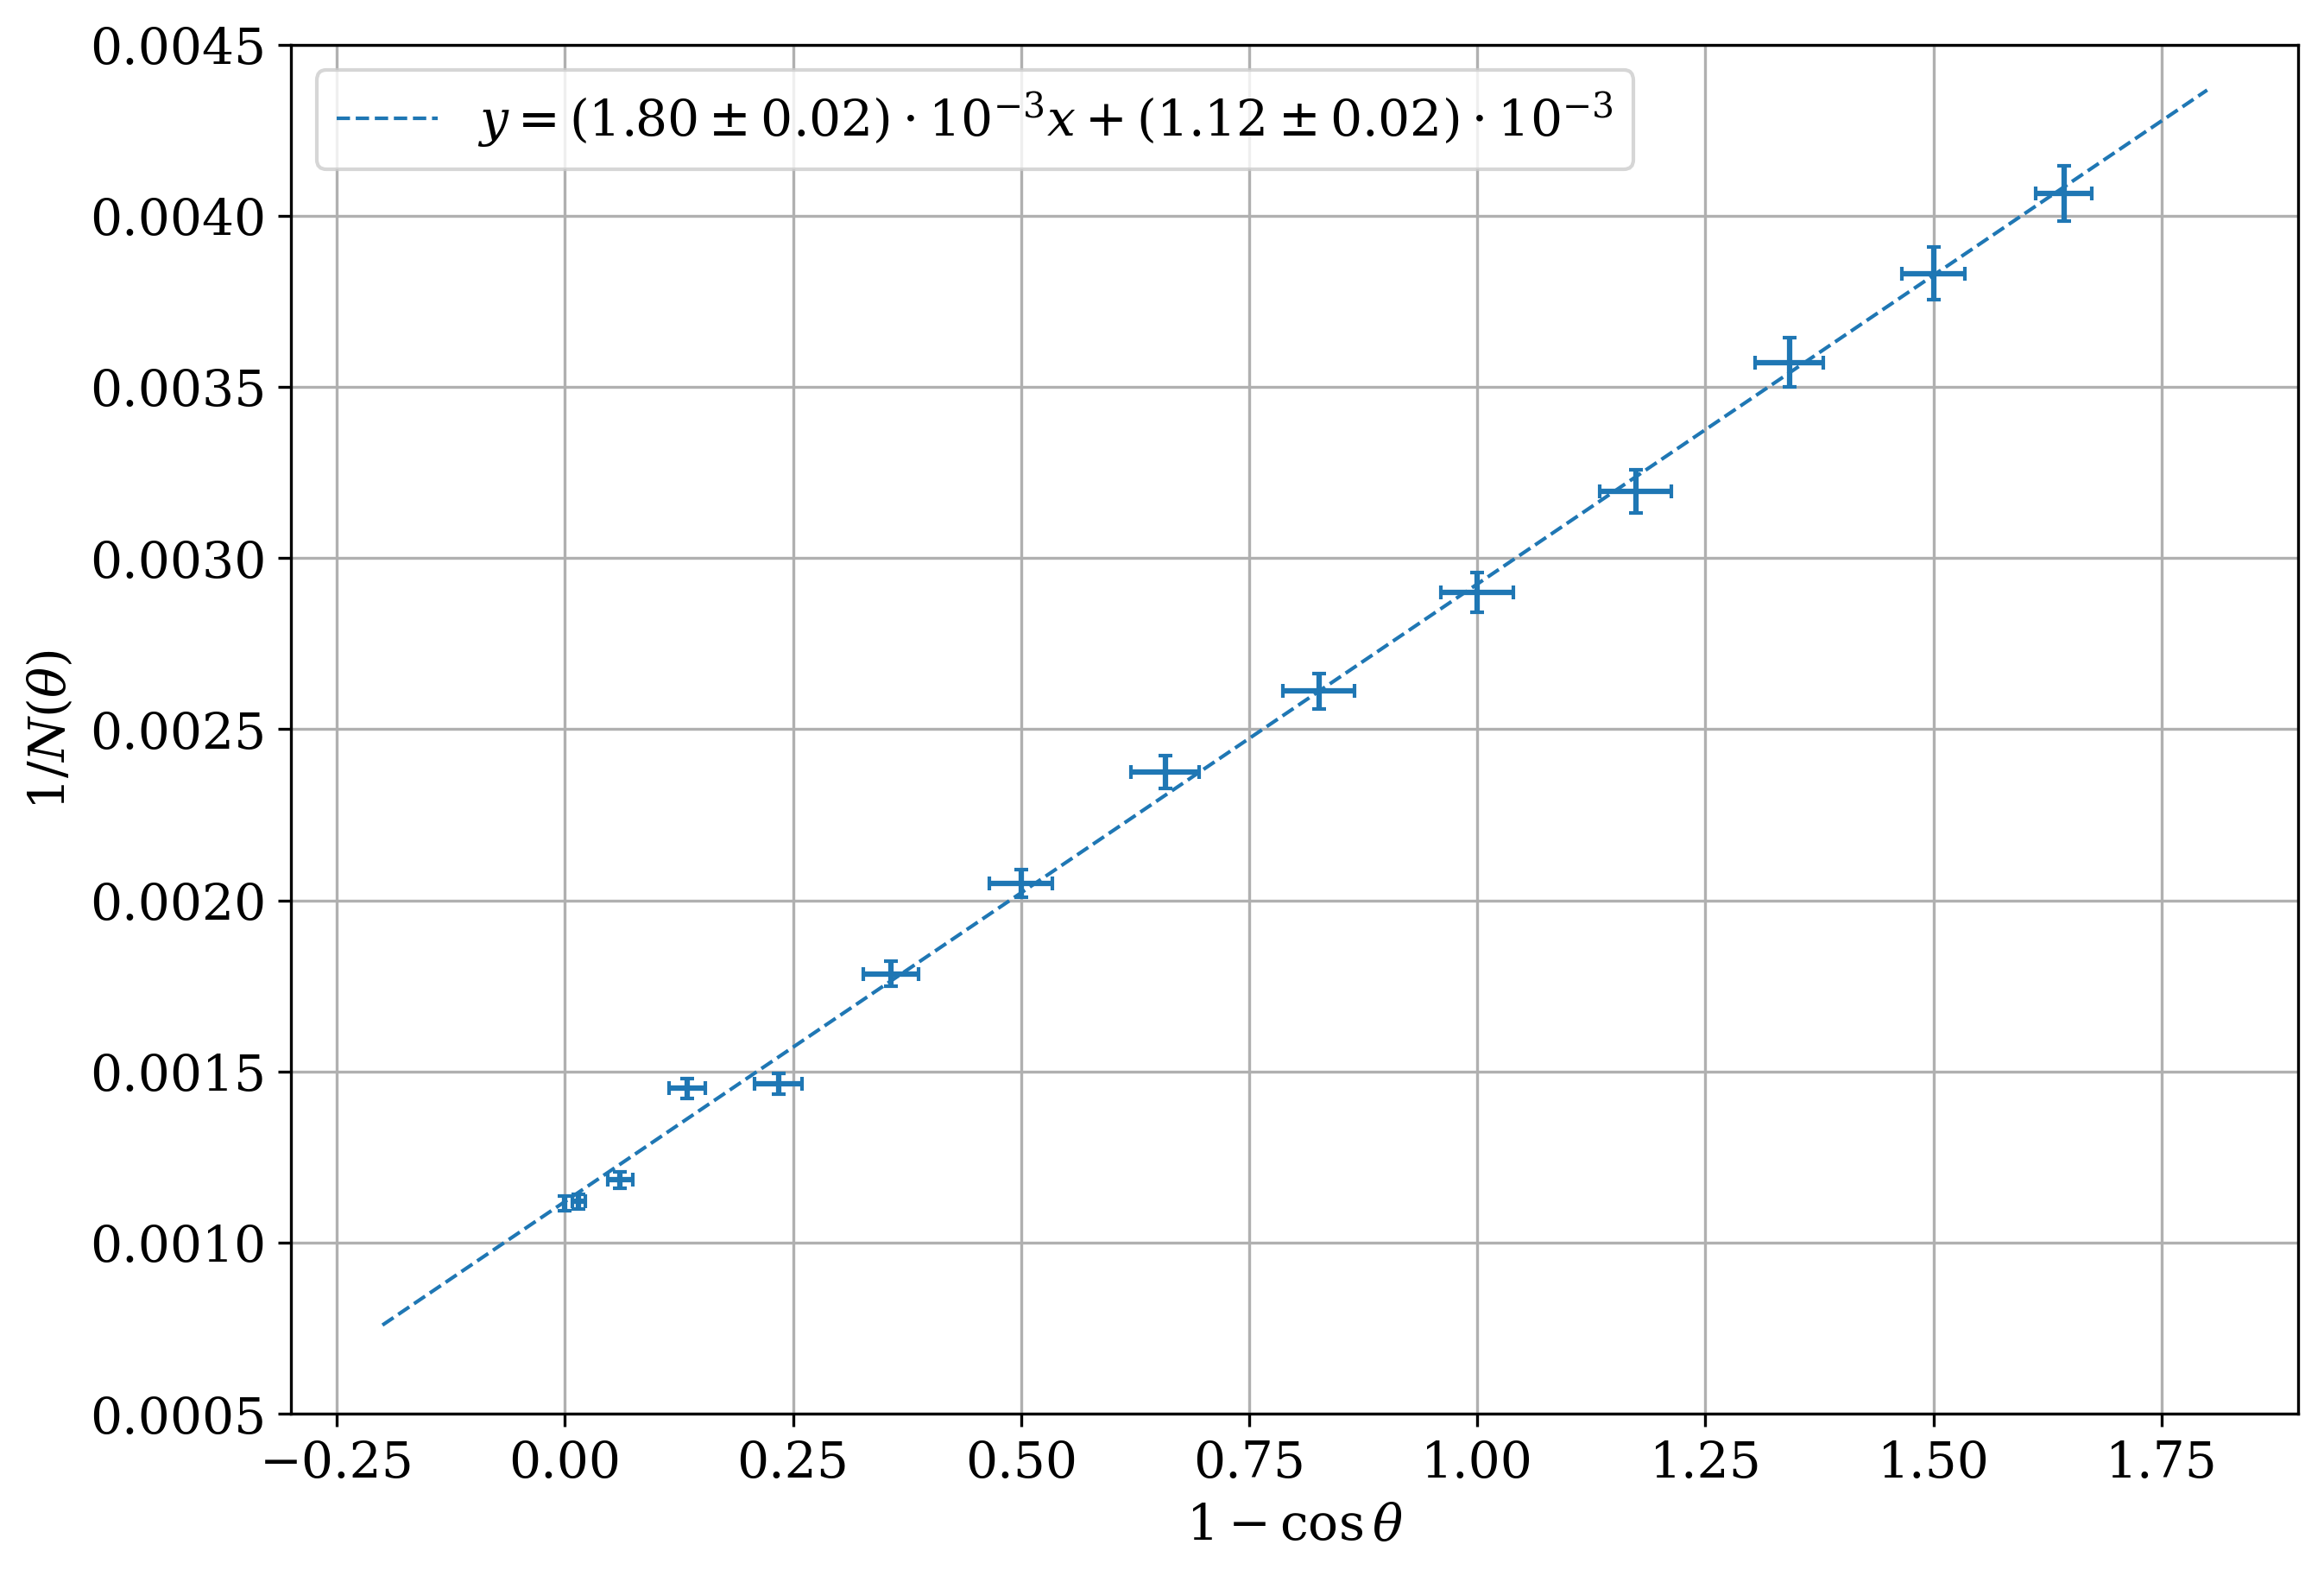

In [59]:
plt.figure()

plt.xlabel(r"$1 - \cos{\theta}$")
plt.ylabel(r"$1/N(\theta)$")

x = 1 - np.cos(np.deg2rad(data.angle))
y = 1 / np.array(data.peak_n)

arg, cov = np.polyfit(x, y, 1, cov=True)
err = np.sqrt(np.diagonal(cov))
f = np.poly1d(arg)
e = 1e3

x_1 = np.linspace(-0.2, 1.80, 2)
plt.plot(x_1, f(x_1), ls='--', lw=1, label=f"$y = ({arg[0]*e:.2f} \pm {err[0]*e:.2f} ) \cdot 10^{{-3}} x + ({arg[1]*e:.2f} \pm {err[1]*e:.2f}) \cdot 10^{{-3}}$")


# plt.scatter(x, y, marker='.')
plt.errorbar(x, y, y*0.02, np.sin(np.deg2rad(data.angle))*0.04, 'none', capsize=2)

plt.ylim(0.0005, 0.0045)

plt.legend()

plt.savefig("plot_2.pdf")

In [35]:
N_0 = 1/f(0)
N_90 = 1/f(1)
print(N_0, N_90)

892.8724938758936 341.99464587448654
